# Statistical analysis - stationarity test

In [52]:
# library for manipulation data
import numpy as np
import pandas as pd

# library for normalized data
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

import seaborn as sns
from matplotlib import pyplot as plt

In [53]:
# library for check stasionarity test
from arch.unitroot import *
from arch.unitroot import ADF
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

In [54]:
# load dataset
dataset = pd.read_csv("dataset/BTC-USD.csv", parse_dates=['Date']);

In [55]:
# view metadata dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2896 entries, 0 to 2895
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2896 non-null   datetime64[ns]
 1   Open       2896 non-null   float64       
 2   High       2896 non-null   float64       
 3   Low        2896 non-null   float64       
 4   Close      2896 non-null   float64       
 5   Adj Close  2896 non-null   float64       
 6   Volume     2896 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 158.5 KB


In [56]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-09,361.894989,363.066986,344.950989,352.218994,352.218994,32915500
1,2014-12-10,352.204987,352.384003,346.364990,346.364990,346.364990,16427700
2,2014-12-11,344.339996,361.356995,338.763000,350.506012,350.506012,32431300
3,2014-12-12,350.833008,352.983002,349.290985,352.541992,352.541992,16989800
4,2014-12-13,352.381012,352.381012,346.588013,347.376007,347.376007,11675900
...,...,...,...,...,...,...,...
2891,2022-11-08,20600.671875,20664.607422,17603.544922,18541.271484,18541.271484,118992465607
2892,2022-11-09,18543.761719,18590.458984,15682.692383,15880.780273,15880.780273,102905151606
2893,2022-11-10,15883.158203,18054.312500,15834.018555,17586.771484,17586.771484,83202283721
2894,2022-11-11,17583.251953,17650.943359,16543.482422,17034.292969,17034.292969,55871616488


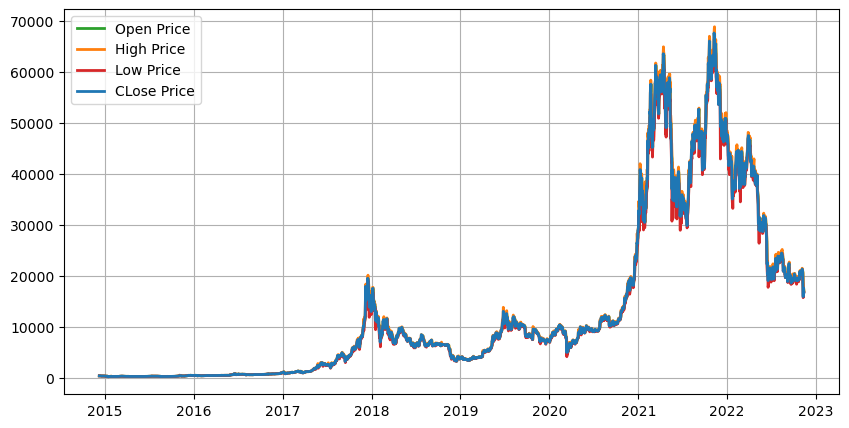

In [57]:
# make frame plot
fig, ax = plt.subplots(figsize = (10,5))

# make time series plot
ax.plot(dataset["Date"], dataset["Open"], color="tab:green", label="Open Price", linewidth=2)
ax.plot(dataset["Date"], dataset["High"], color="tab:orange", label="High Price", linewidth=2)
ax.plot(dataset["Date"], dataset["Low"], color="tab:red", label="Low Price", linewidth=2)
ax.plot(dataset["Date"], dataset["Close"], color="tab:blue", label="CLose Price", linewidth=2)

# set labels
ax.set_title("", fontsize=12)
ax.set_xlabel("", fontsize=10)
ax.set_ylabel("", fontsize=10)
ax.legend(loc='upper left')
ax.grid(True)

plt.show()

In [58]:
# processing normalized data
scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(dataset[["Open", "Close", "Low", "High"]])

In [59]:
np.round(scaled[:5],7)

array([[-0.9945082, -0.9948325, -0.9947609, -0.9955864],
       [-0.9947959, -0.9950062, -0.9947182, -0.995898 ],
       [-0.9950294, -0.9948833, -0.9949478, -0.9956363],
       [-0.9948366, -0.9948229, -0.9946298, -0.9958805],
       [-0.9947907, -0.9949762, -0.9947115, -0.9958981]])

In [60]:
scaled.shape

(2896, 4)

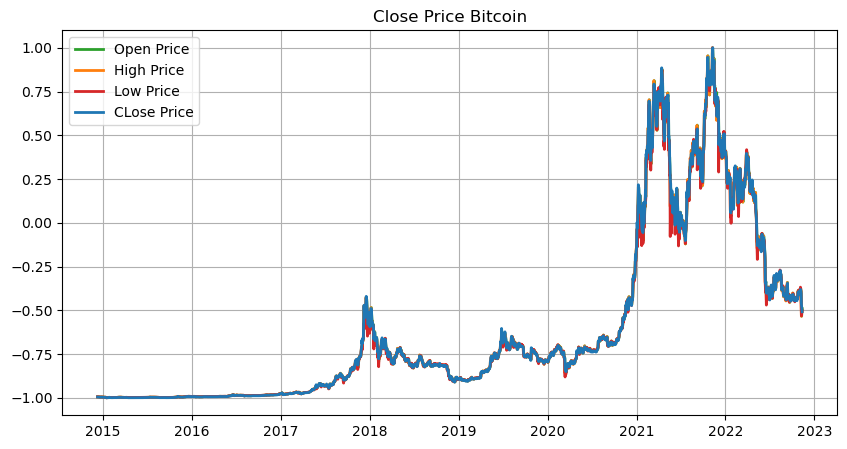

In [61]:
# make frame plot
fig, ax = plt.subplots(figsize = (10,5))

# make time series plot
ax.plot(dataset["Date"], scaled[:, 0:1], color="tab:green", label="Open Price", linewidth=2)
ax.plot(dataset["Date"], scaled[:, 1:2], color="tab:orange", label="High Price", linewidth=2)
ax.plot(dataset["Date"], scaled[:, 2:3], color="tab:red", label="Low Price", linewidth=2)
ax.plot(dataset["Date"], scaled[:, 3:4], color="tab:blue", label="CLose Price", linewidth=2)

# set labels
ax.set_title("Close Price Bitcoin", fontsize=12)
ax.set_xlabel("", fontsize=10)
ax.set_ylabel("", fontsize=10)
ax.legend(loc='upper left')
ax.grid(True)

plt.show()

## ADF Test

In [62]:
adf = ADF(scaled[:, 3:4], lags=60, trend="c")
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.907
P-value                         0.329
Lags                               60
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


## PP Test

In [63]:
pp = PhillipsPerron(scaled[:, 3:4], lags=60, trend="c")
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.607
P-value                         0.480
Lags                               60
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


## KPSS Test

In [64]:
kpss = KPSS(scaled[:, 3:4], lags=60, trend="c")
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  3.080
P-value                         0.000
Lags                               60
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
